# PyTorch Tutorial 03: Feed Forward Models

In [3]:
import torch
import numpy as np

# SoftMax

$$ S(Y_i) = \frac{e^{Y_i}}{\sum_{i=1}^{N}{e^{Y_i}}} $$

# Cross Entropy Loss

$$ L = -\frac{1}{N}\sum_{i=1}^{N}Y_i.Log(\hat{Y_i})$$

In [23]:
def soft_max(y):
    return np.exp(y) / np.sum(np.exp(y))

def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))# /len(y_pred) As pytorch ignores the normalization (Division by N) we ignore it to build the same results with the original function

In [24]:
# Should be one hot encoded.
Y = np.array([1,0,0])
# Prediction values
Y_hat = np.array([2,1,0.1])

print(f"SoftMax of Y: {soft_max(Y_hat)}")
print(f"CEL of Y_pred: {cross_entropy_loss(Y,soft_max(Y_hat)):.3f}")


SoftMax of Y: [0.65900114 0.24243297 0.09856589]
CEL of Y_pred: 0.417


# Use PyTorch

Cross Entropy Loss is available in nural network module on pytorch library (`torch.nn`). Before use this function, you need to rememer there is no need for converting labels (Ys) to one-hot vector, this will automatically done by the function and also, there is no need to place a softmax activation function before calculating the loss, this is also applied by the library. 

> Note: For binary classification use Binary Cross Entropy Loss.

In [25]:
loss = torch.nn.CrossEntropyLoss()

Y = torch.tensor([0])
Y_hat = torch.tensor([[2,1,0.1]])

print (f"Torch calculated loss: {loss(Y_hat, Y):.3f}")

Torch calculated loss: 0.417


# Simple multi class classifier using pytorch

In [78]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Get GPU device if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [79]:
# Mnist dataset
mnist_train = torchvision.datasets.MNIST(root='../data/mnist', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='../data/mnist', train=False, download=True, transform=torchvision.transforms.ToTensor())

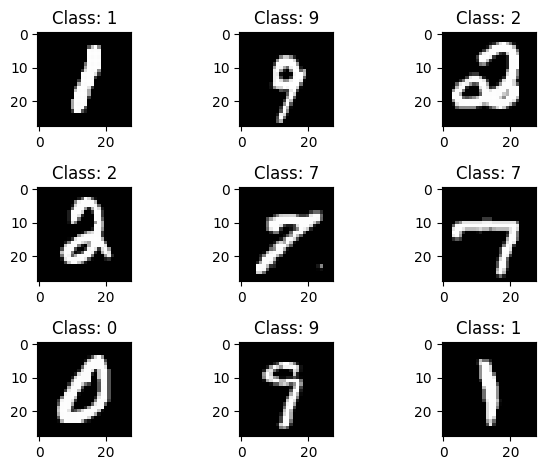

In [80]:
cnt = 1
for i in np.random.randint(0, len(mnist_train), 9):
    x, y = mnist_train[i]
    plt.subplot(3, 3, cnt)
    plt.imshow(x[0,:,:], cmap='gray')
    plt.title(f"Class: {y}")
    cnt += 1
    
plt.tight_layout()
plt.show()

In [81]:
class ClassifierModel(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(28*28, 128)
        self.relu = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(128, 10)
    
    def forward(self, x):
        return self.l2(self.relu(self.l1(x)))

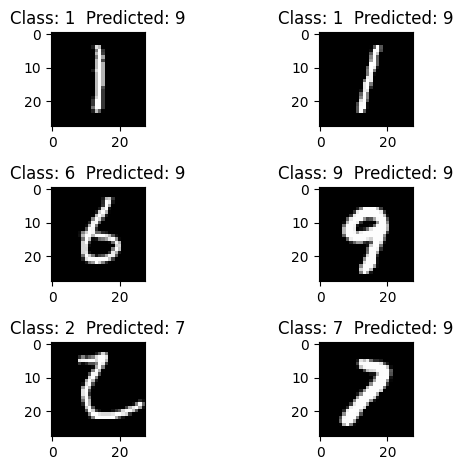

In [82]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True)


model = ClassifierModel().to(device)

with torch.no_grad():
    cnt = 1
    for i in np.random.randint(0, len(mnist_test), 6):
        x, y = mnist_test[i]
        plt.subplot(3, 2, cnt)
        plt.imshow(x[0,:,:], cmap='gray')
        x = x.view(-1, 28*28).to(device)
        output = model(x)
        _, prediction = torch.max(output, 1)
        plt.title(f"Class: {y}  Predicted: {prediction[0].item()}")
        cnt += 1
        
    plt.tight_layout()
    plt.show()


In [83]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model_loss = 0
    model_acc = 0
    for X, Y in train_loader:
        X = X.view(-1,28*28).to(device)
        Y = Y.to(device)
        Y_pred = model(X)
        loss = criterion(Y_pred, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            model_loss = loss.item()
    
    with torch.no_grad():
        acc = 0
        loss = 0
        for x, y in test_loader:
            x = x.view(-1,28*28).to(device)
            y = y.to(device)
            output = model(x)
            _, prediction = torch.max(output, 1)
            acc += (prediction == y).sum().item()
            loss += criterion(output, y)
        acc = acc / len(mnist_test)
        acc *= 100
        loss = loss / len(mnist_test)
        print (f"epoch #{epoch} model_loss: {model_loss:0.3f} test_acc: {acc:0.3f} test_loss: {loss:0.3f}")

epoch #0 model_loss: 0.184 test_acc: 94.580 test_loss: 0.003
epoch #1 model_loss: 0.103 test_acc: 96.100 test_loss: 0.002
epoch #2 model_loss: 0.360 test_acc: 96.860 test_loss: 0.002
epoch #3 model_loss: 0.069 test_acc: 97.360 test_loss: 0.001
epoch #4 model_loss: 0.004 test_acc: 97.480 test_loss: 0.001
epoch #5 model_loss: 0.027 test_acc: 97.390 test_loss: 0.001
epoch #6 model_loss: 0.078 test_acc: 97.370 test_loss: 0.001
epoch #7 model_loss: 0.046 test_acc: 97.610 test_loss: 0.001
epoch #8 model_loss: 0.040 test_acc: 97.790 test_loss: 0.001
epoch #9 model_loss: 0.003 test_acc: 97.790 test_loss: 0.001


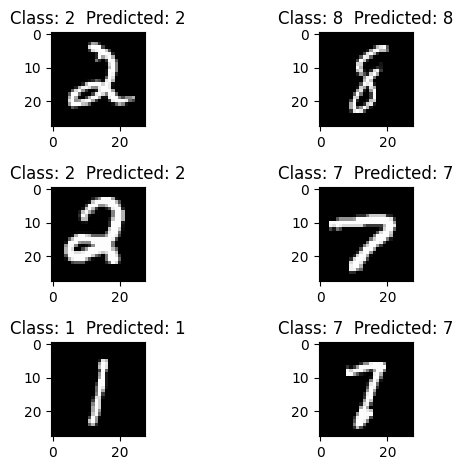

In [77]:
with torch.no_grad():
    cnt = 1
    for i in np.random.randint(0, len(mnist_test), 6):
        x, y = mnist_test[i]
        plt.subplot(3, 2, cnt)
        plt.imshow(x[0,:,:], cmap='gray')
        x = x.view(-1, 28*28).to(device)
        output = model(x)
        _, prediction = torch.max(output, 1)
        plt.title(f"Class: {y}  Predicted: {prediction[0].item()}")
        cnt += 1
        
    plt.tight_layout()
    plt.show()

# Activation functions
Some popular functions:

1. Step function (Not used in practice)
2. Sigmoid function (Last layer in binary classification)
3. Tanh function (Usually used for hidden layers)
4. ReLU function (When we don't know what to use, use ReLU)
5. LeakyReLU function (Improved version of ReLU, Solved gradient vanishing problem)
6. Softmax function (Good at the last layer of multi-class classification)
7. Softplus function
8. ELU function

These functions are available in `torch.nn.functional`.